In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [3]:
df = pd.read_csv("ncr_ride_bookings.csv")

In [17]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Month
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,November
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,August
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,October
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,September


In [5]:
booking_status_counts = df['Booking Status'].value_counts()

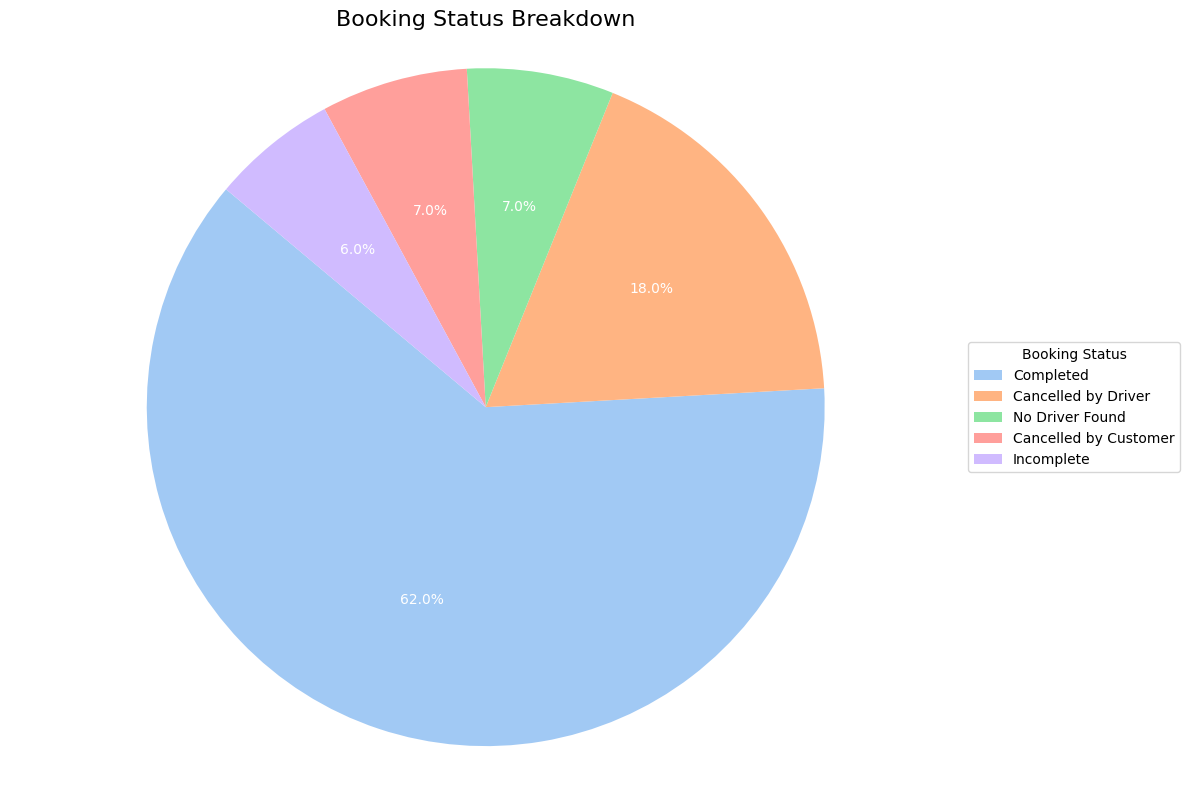

In [6]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:len(booking_status_counts)]
wedges, texts, autotexts = plt.pie(booking_status_counts, autopct='%1.1f%%', startangle=140, colors=colors, textprops=dict(color="w"))
plt.title('Booking Status Breakdown', fontsize=16)
plt.legend(wedges, booking_status_counts.index,
           title="Booking Status",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\kunal\AppData\Local\Temp\ipykernel_6788\2249750442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')


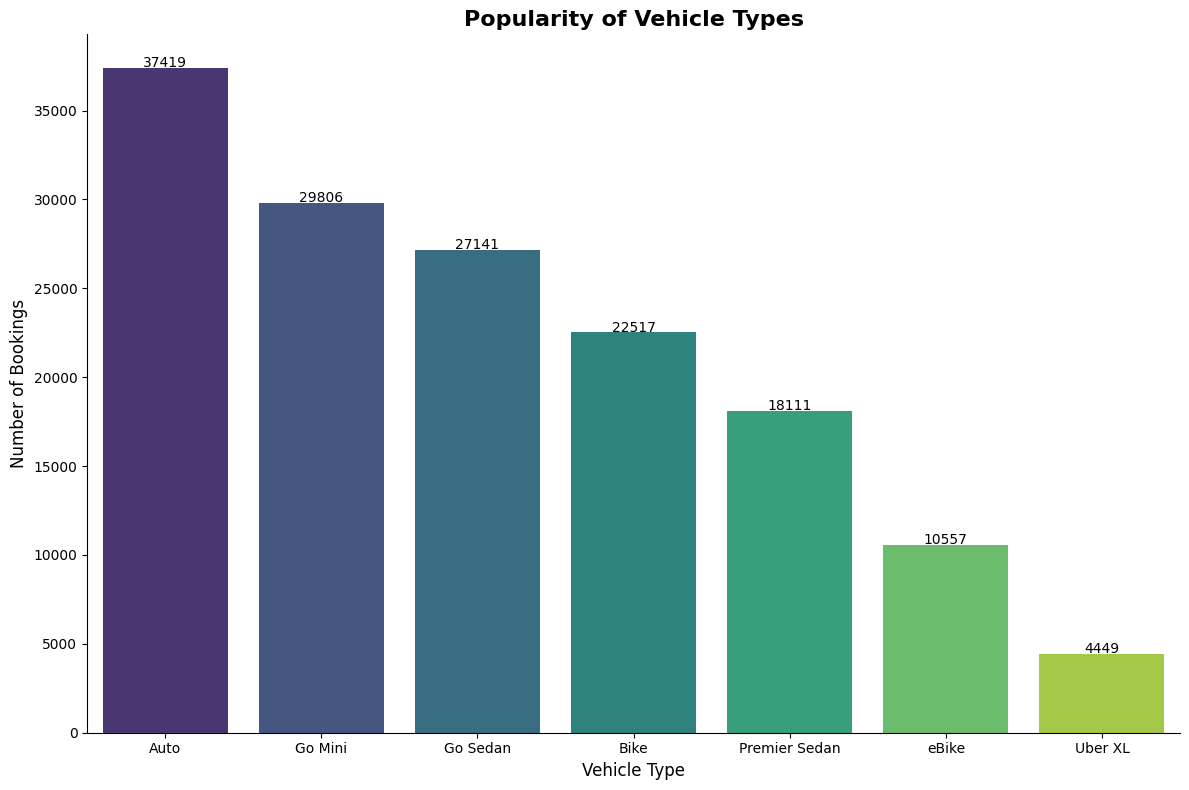

In [7]:
## Analysis of Vehicle Type Popularity

vehicle_counts = df['Vehicle Type'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')

plt.title('Popularity of Vehicle Types', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)

plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(vehicle_counts.values):
    plt.text(index, value + 50, str(value), color='black', ha='center')

sns.despine()
plt.tight_layout()
plt.show()

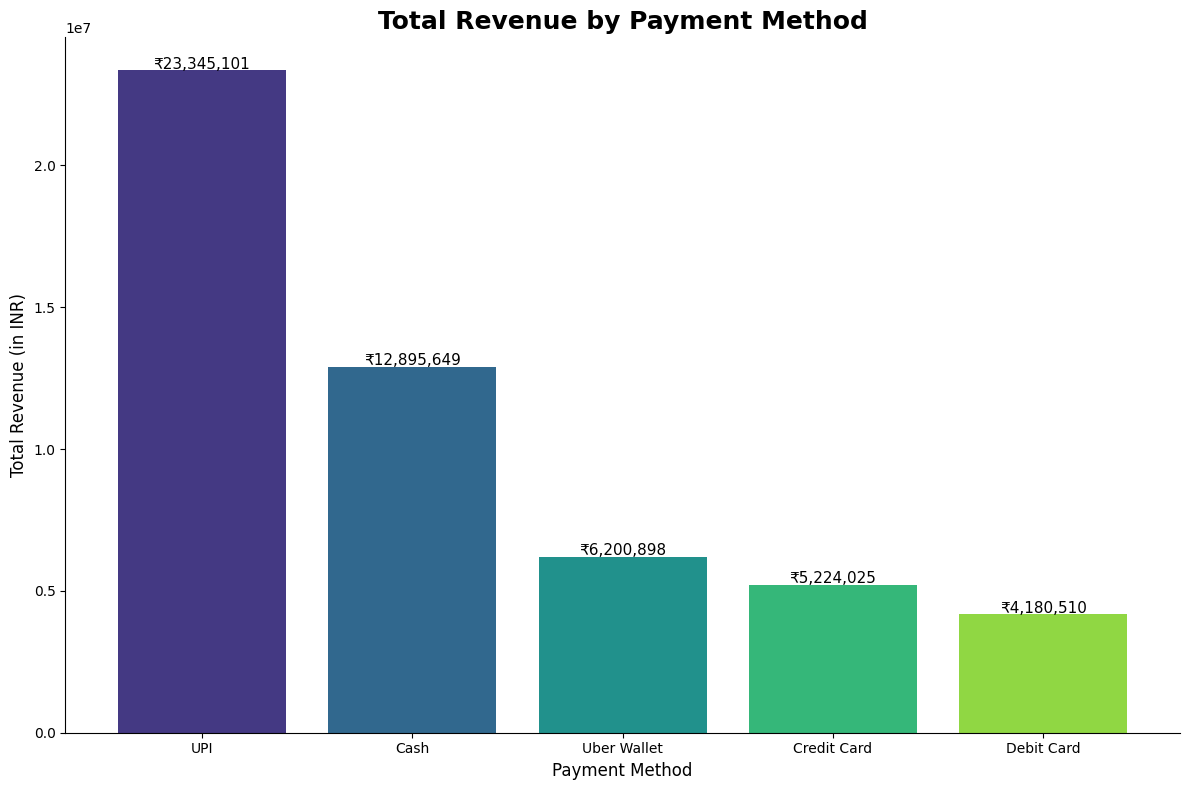

In [8]:
## Analysis of Revenue Distribution by Payment Method
revenue_df = df.dropna(subset=['Booking Value', 'Payment Method'])

revenue_by_payment = revenue_df.groupby('Payment Method')['Booking Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = revenue_by_payment.plot(kind='bar', color=sns.color_palette("viridis", len(revenue_by_payment)), width=0.8)

plt.title('Total Revenue by Payment Method', fontsize=18, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Revenue (in INR)', fontsize=12)

plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

for i, value in enumerate(revenue_by_payment):
    plt.text(i, value + 50000, f'₹{int(value):,}', ha='center', fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

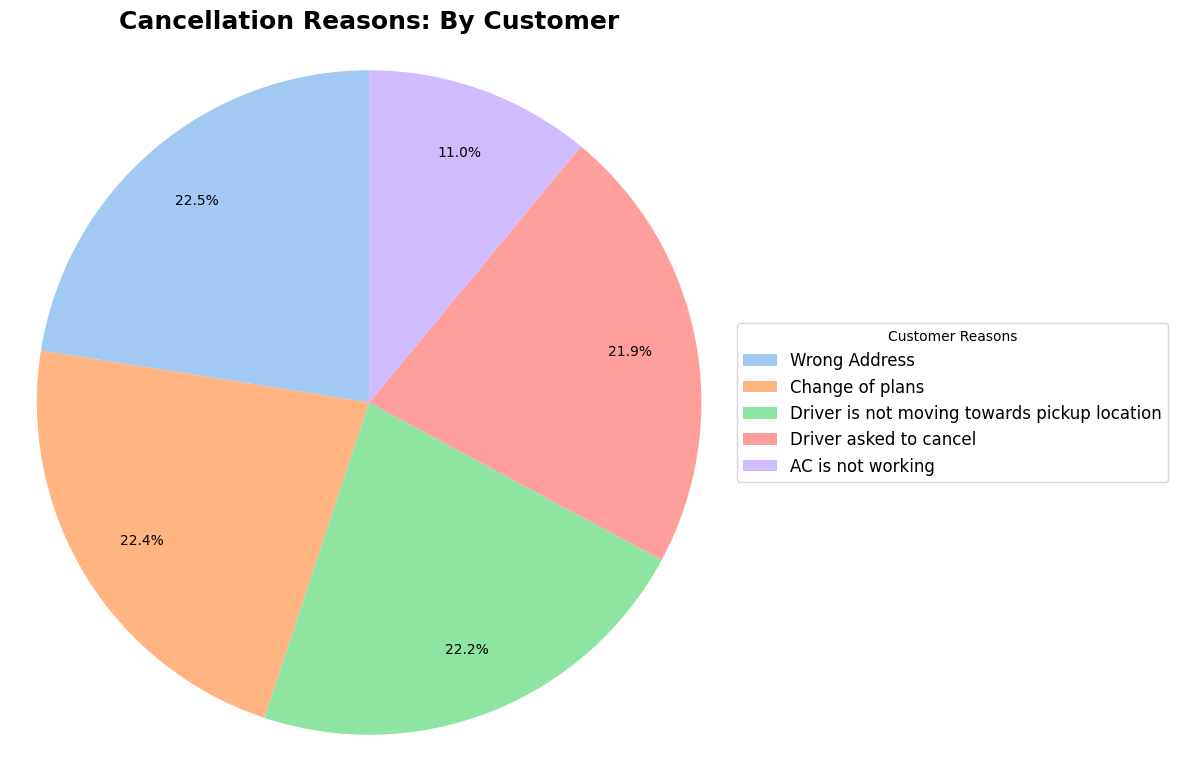

In [9]:
## Analysis of Customer Cancellation Reasons

customer_cancellations_df = df[df['Cancelled Rides by Customer'] == 1].dropna(subset=['Reason for cancelling by Customer'])

customer_reason_counts = customer_cancellations_df['Reason for cancelling by Customer'].value_counts()

if not customer_reason_counts.empty:
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette('pastel', len(customer_reason_counts))

    wedges, texts, autotexts = plt.pie(
        customer_reason_counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        pctdistance=0.8,
        wedgeprops={'linewidth': 0}
    )

    plt.legend(
        wedges,
        customer_reason_counts.index,
        title="Customer Reasons",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12
    )

    plt.title('Cancellation Reasons: By Customer', fontsize=18, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout(pad=1.5)
    plt.show()
else:
    print("No customer cancellation reasons found to plot.")

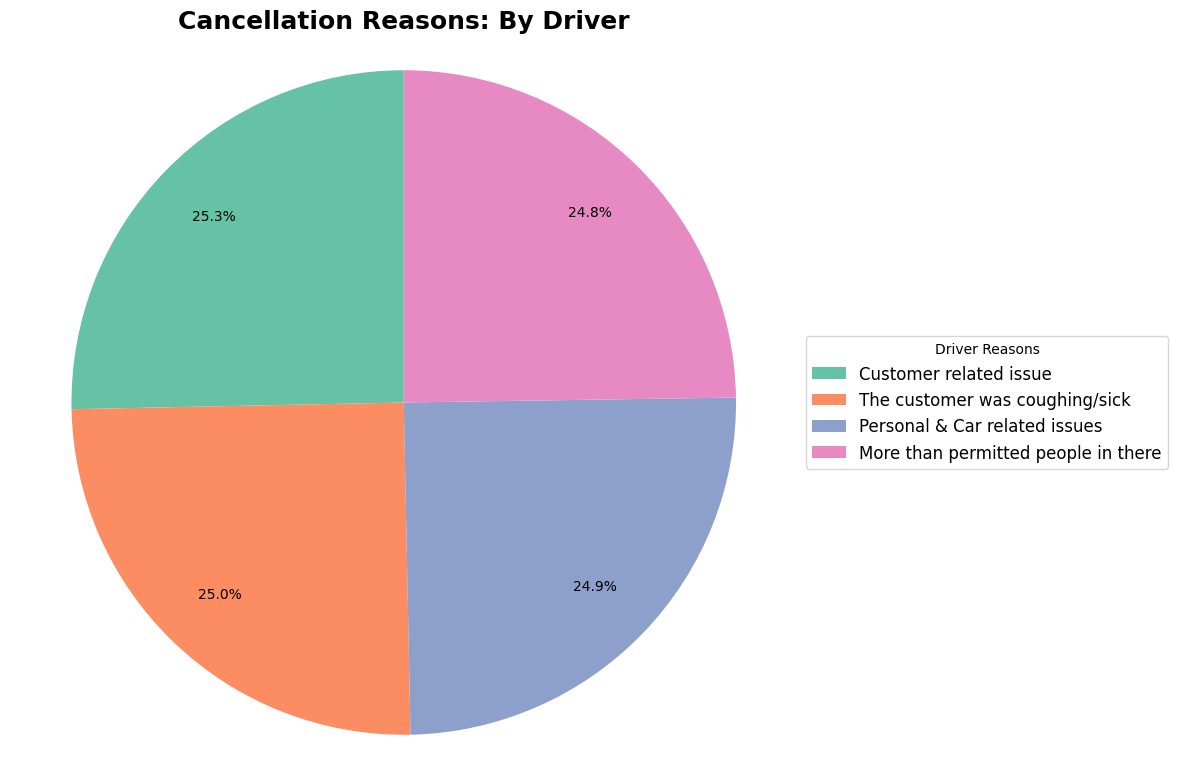

In [10]:
## Analysis of Driver Cancellation Reasons

driver_cancellations_df = df[df['Cancelled Rides by Driver'] == 1].dropna(subset=['Driver Cancellation Reason'])

driver_reason_counts = driver_cancellations_df['Driver Cancellation Reason'].value_counts()

if not driver_reason_counts.empty:
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette('Set2', len(driver_reason_counts))

    wedges, texts, autotexts = plt.pie(
        driver_reason_counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        pctdistance=0.8,
        wedgeprops={'linewidth': 0}
    )

    plt.legend(
        wedges,
        driver_reason_counts.index,
        title="Driver Reasons",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12
    )

    plt.title('Cancellation Reasons: By Driver', fontsize=18, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout(pad=1.5)
    plt.show()
else:
    print("No driver cancellation reasons found to plot.")

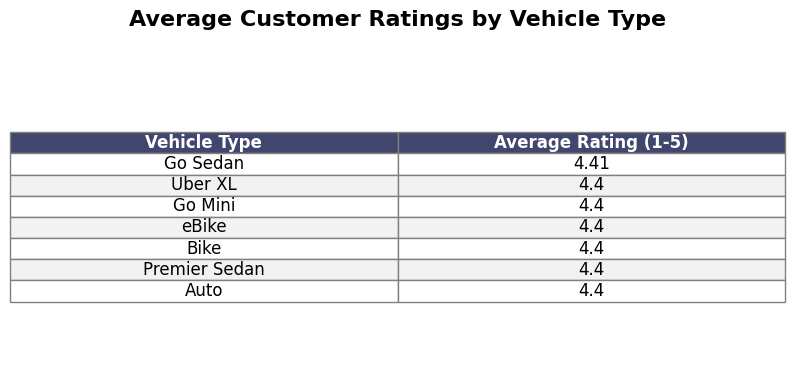

In [11]:
## Average Customer Ratings

ratings_df = df[df['Booking Status'] == 'Completed'].dropna(subset=['Customer Rating', 'Vehicle Type'])
ratings_df['Customer Rating'] = pd.to_numeric(ratings_df['Customer Rating'], errors='coerce')
ratings_df.dropna(subset=['Customer Rating'], inplace=True)

average_ratings_table = ratings_df.groupby('Vehicle Type')['Customer Rating'].mean().reset_index()
average_ratings_table.rename(columns={'Customer Rating': 'Average Rating (1-5)'}, inplace=True)
average_ratings_table = average_ratings_table.sort_values(by='Average Rating (1-5)', ascending=False)
average_ratings_table['Average Rating (1-5)'] = average_ratings_table['Average Rating (1-5)'].round(2)
average_ratings_table.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(8, 4))

ax.axis('tight')
ax.axis('off')

the_table = ax.table(
    cellText=average_ratings_table.values,
    colLabels=average_ratings_table.columns,
    loc='center',
    cellLoc='center'
)

the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)

for (row, col), cell in the_table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        if row % 2 == 0:
            cell.set_facecolor('#f2f2f2')
        else:
            cell.set_facecolor('#ffffff')
    cell.set_edgecolor('grey')

plt.title('Average Customer Ratings by Vehicle Type', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

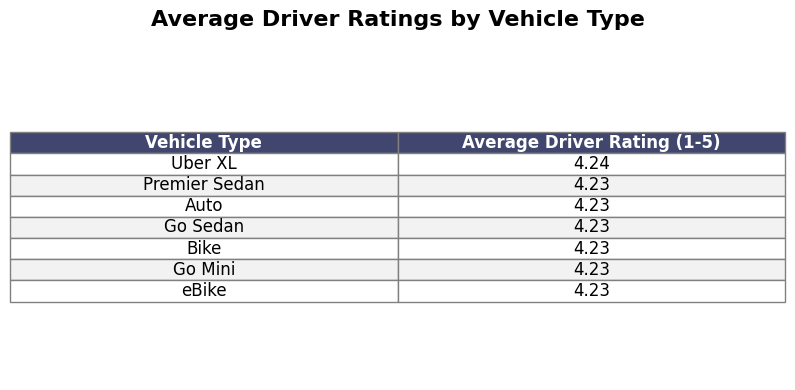

In [12]:
## Table for Average Driver Ratings

driver_ratings_df = df[df['Booking Status'] == 'Completed'].dropna(subset=['Driver Ratings', 'Vehicle Type'])
driver_ratings_df['Driver Ratings'] = pd.to_numeric(driver_ratings_df['Driver Ratings'], errors='coerce')
driver_ratings_df.dropna(subset=['Driver Ratings'], inplace=True)

average_driver_ratings_table = driver_ratings_df.groupby('Vehicle Type')['Driver Ratings'].mean().reset_index()
average_driver_ratings_table.rename(columns={'Driver Ratings': 'Average Driver Rating (1-5)'}, inplace=True)
average_driver_ratings_table = average_driver_ratings_table.sort_values(by='Average Driver Rating (1-5)', ascending=False)
average_driver_ratings_table['Average Driver Rating (1-5)'] = average_driver_ratings_table['Average Driver Rating (1-5)'].round(2)
average_driver_ratings_table.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(8, 4))

ax.axis('tight')
ax.axis('off')

the_table = ax.table(
    cellText=average_driver_ratings_table.values,
    colLabels=average_driver_ratings_table.columns,
    loc='center',
    cellLoc='center'
)

the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)

for (row, col), cell in the_table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        if row % 2 == 0:
            cell.set_facecolor('#f2f2f2')
        else:
            cell.set_facecolor('#ffffff')
    cell.set_edgecolor('grey')

plt.title('Average Driver Ratings by Vehicle Type', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

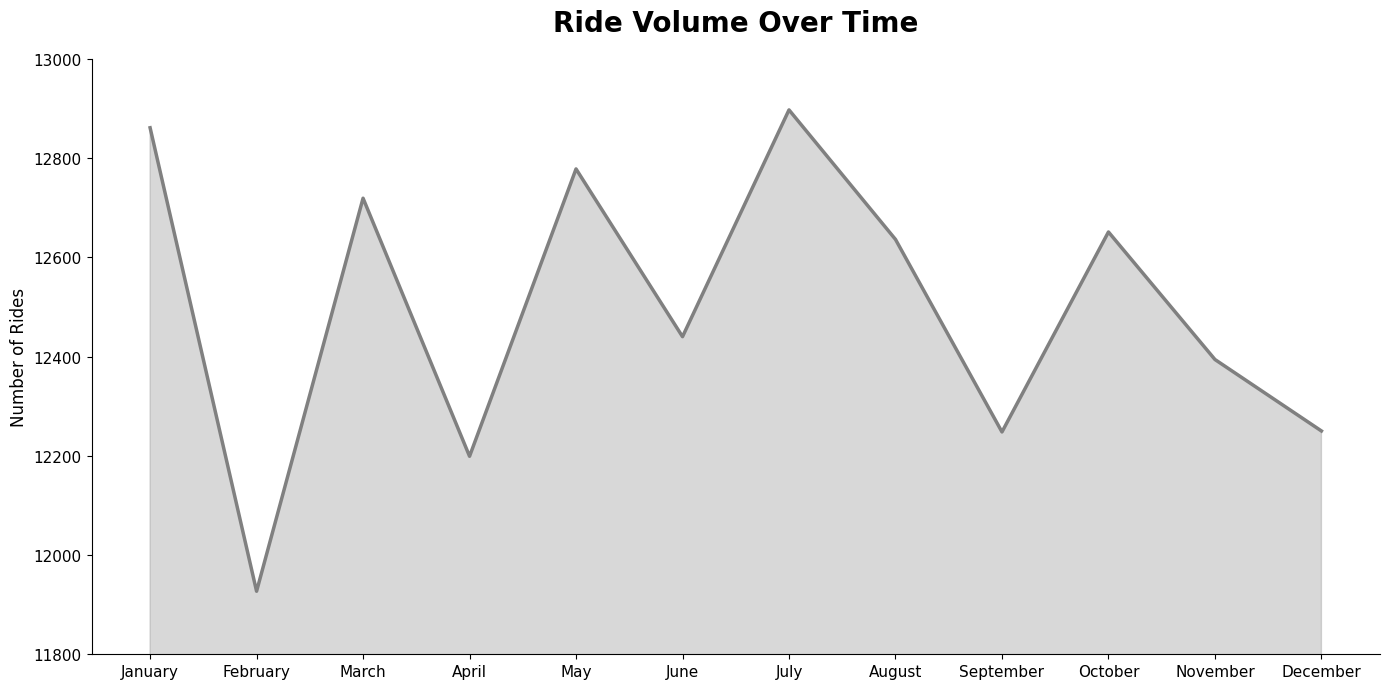

In [13]:
## Ride Volume Analysis

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
monthly_rides = df['Month'].value_counts()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_rides = monthly_rides.reindex(month_order).dropna()

plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 7))

line = sns.lineplot(
    x=monthly_rides.index,
    y=monthly_rides.values,
    linestyle='-',
    linewidth=2.5,
    color='grey'
)

ax.fill_between(
    monthly_rides.index,
    monthly_rides.values,
    11000,
    color='grey',
    alpha=0.3
)

plt.title('Ride Volume Over Time', fontsize=20, fontweight='bold', pad=20)
plt.ylabel('Number of Rides', fontsize=12)
plt.xlabel(None)
plt.xticks(rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=11)
ax.grid(axis='y', linestyle='', alpha=0.7)
sns.despine()

plt.ylim(11800, 13000)

plt.tight_layout()
plt.show()

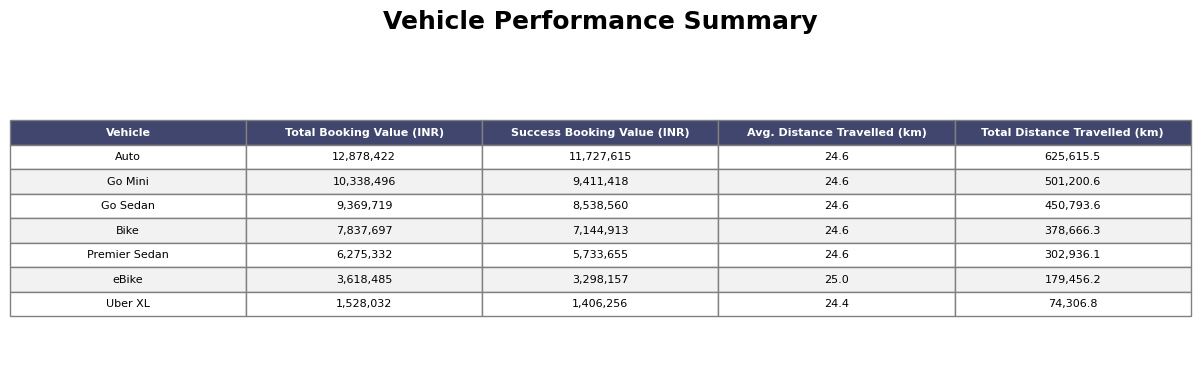

In [14]:
## Performance Summary Table by Vehicle Type

df['Booking Value'] = pd.to_numeric(df['Booking Value'], errors='coerce')
df['Ride Distance'] = pd.to_numeric(df['Ride Distance'], errors='coerce')

summary_table = df.groupby('Vehicle Type').agg(
    Total_Booking_Value=('Booking Value', 'sum'),
    Total_Distance_Travelled=('Ride Distance', 'sum'),
    Avg_Distance_Travelled=('Ride Distance', 'mean')
).reset_index()

completed_rides_df = df[df['Booking Status'] == 'Completed']
success_value = completed_rides_df.groupby('Vehicle Type')['Booking Value'].sum().reset_index()
success_value.rename(columns={'Booking Value': 'Success_Booking_Value'}, inplace=True)

summary_table = pd.merge(summary_table, success_value, on='Vehicle Type', how='left')

summary_table.rename(columns={
    'Vehicle Type': 'Vehicle',
    'Total_Booking_Value': 'Total Booking Value (INR)',
    'Success_Booking_Value': 'Success Booking Value (INR)',
    'Avg_Distance_Travelled': 'Avg. Distance Travelled (km)',
    'Total_Distance_Travelled': 'Total Distance Travelled (km)'
}, inplace=True)

summary_table = summary_table.sort_values(by='Total Booking Value (INR)', ascending=False)

summary_table['Total Booking Value (INR)'] = summary_table['Total Booking Value (INR)'].map('{:,.0f}'.format)
summary_table['Success Booking Value (INR)'] = summary_table['Success Booking Value (INR)'].fillna(0).map('{:,.0f}'.format)
summary_table['Total Distance Travelled (km)'] = summary_table['Total Distance Travelled (km)'].map('{:,.1f}'.format)
summary_table['Avg. Distance Travelled (km)'] = summary_table['Avg. Distance Travelled (km)'].map('{:.1f}'.format)

summary_table = summary_table[[
    'Vehicle', 'Total Booking Value (INR)', 'Success Booking Value (INR)',
    'Avg. Distance Travelled (km)', 'Total Distance Travelled (km)'
]]

summary_table.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight'); ax.axis('off')

the_table = ax.table(
    cellText=summary_table.values,
    colLabels=summary_table.columns,
    loc='center',
    cellLoc='center'
)

the_table.set_fontsize(12)
the_table.scale(1.2, 1.4)

for (row, col), cell in the_table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f2f2f2' if row % 2 == 0 else '#ffffff')
    cell.set_edgecolor('grey')

plt.title('Vehicle Performance Summary', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

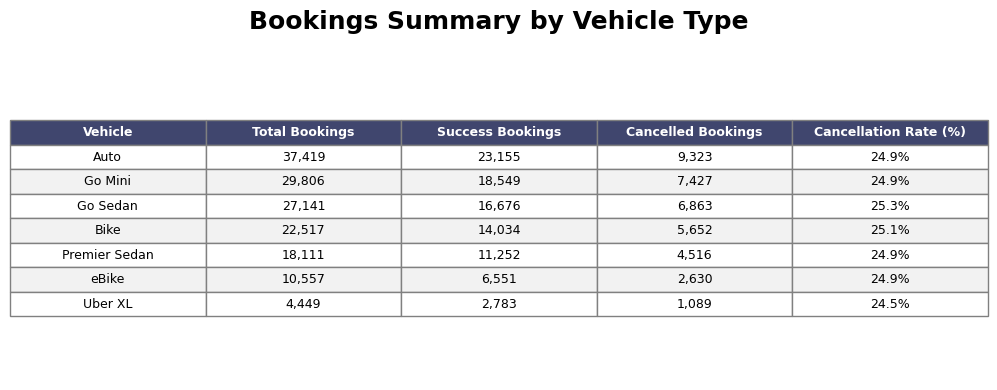

In [15]:
## Booking Summary Table by Vehicle Type

total_bookings = df.groupby('Vehicle Type').size().reset_index(name='Total Bookings')

success_bookings = df[df['Booking Status'] == 'Completed'].groupby('Vehicle Type').size().reset_index(name='Success Bookings')

cancelled_rides_df = df[(df['Cancelled Rides by Customer'] == 1) | (df['Cancelled Rides by Driver'] == 1)]
cancelled_bookings = cancelled_rides_df.groupby('Vehicle Type').size().reset_index(name='Cancelled Bookings')

summary_table = pd.merge(total_bookings, success_bookings, on='Vehicle Type', how='left')
summary_table = pd.merge(summary_table, cancelled_bookings, on='Vehicle Type', how='left')

summary_table = summary_table.fillna(0)

summary_table['Cancellation Rate (%)'] = (
    (summary_table['Cancelled Bookings'] / summary_table['Total Bookings']) * 100
).fillna(0)

summary_table = summary_table.sort_values(by='Total Bookings', ascending=False)

summary_table['Total Bookings'] = summary_table['Total Bookings'].map('{:,.0f}'.format)
summary_table['Success Bookings'] = summary_table['Success Bookings'].astype(int).map('{:,.0f}'.format)
summary_table['Cancelled Bookings'] = summary_table['Cancelled Bookings'].astype(int).map('{:,.0f}'.format)
summary_table['Cancellation Rate (%)'] = summary_table['Cancellation Rate (%)'].map('{:.1f}%'.format)

summary_table.rename(columns={'Vehicle Type': 'Vehicle'}, inplace=True)
summary_table.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight'); ax.axis('off')

the_table = ax.table(
    cellText=summary_table.values,
    colLabels=summary_table.columns,
    loc='center',
    cellLoc='center'
)

the_table.set_fontsize(12)
the_table.scale(1.2, 1.4)

for (row, col), cell in the_table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f2f2f2' if row % 2 == 0 else '#ffffff')
    cell.set_edgecolor('grey')

plt.title('Bookings Summary by Vehicle Type', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

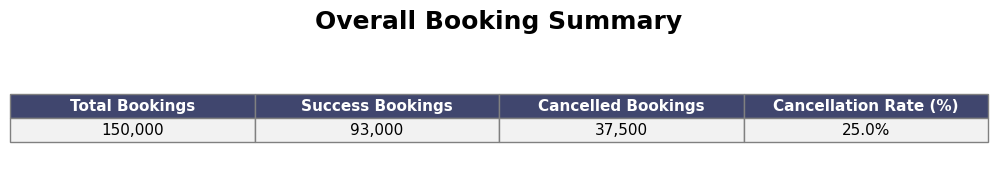

In [16]:
## Overall Booking Summary Table

total_bookings = len(df)
success_bookings = len(df[df['Booking Status'] == 'Completed'])
cancelled_bookings = len(df[(df['Cancelled Rides by Customer'] == 1) | (df['Cancelled Rides by Driver'] == 1)])

if total_bookings > 0:
    cancellation_rate = (cancelled_bookings / total_bookings) * 100
else:
    cancellation_rate = 0

summary_data = {
    'Total Bookings': [total_bookings],
    'Success Bookings': [success_bookings],
    'Cancelled Bookings': [cancelled_bookings],
    'Cancellation Rate (%)': [cancellation_rate]
}
summary_table = pd.DataFrame(summary_data)

summary_table['Total Bookings'] = summary_table['Total Bookings'].map('{:,.0f}'.format)
summary_table['Success Bookings'] = summary_table['Success Bookings'].map('{:,.0f}'.format)
summary_table['Cancelled Bookings'] = summary_table['Cancelled Bookings'].map('{:,.0f}'.format)
summary_table['Cancellation Rate (%)'] = summary_table['Cancellation Rate (%)'].map('{:.1f}%'.format)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(
    cellText=summary_table.values,
    colLabels=summary_table.columns,
    loc='center',
    cellLoc='center'
)

the_table.set_fontsize(14)
the_table.scale(1.2, 1.8)

for (row, col), cell in the_table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_facecolor('#f2f2f2')
    cell.set_edgecolor('grey')

plt.title('Overall Booking Summary', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()